In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [10]:
import unidecode
import string
import random
import re

all_characters = string.printable
n_characters = len(all_characters)

file = unidecode.unidecode(open('enwik8.txt','r',encoding='utf-16').read())
file_len = len(file)
print('file_len =', file_len)

file_len = 99724176


In [18]:
chunk_len = 200

def random_chunk():
    start_index = random.randint(0, file_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

scription''' of ''s''. The '''Kolmogorov complexity''' of ''s'', written ''K''(''s''), is
:&lt;math&gt;K(s) = |d(s)|. \quad &lt;/math&gt;
In the other words, ''K''(''s'') is the length of the minimal d


In [37]:
# Turn string into list of longs
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


In [38]:

def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

In [78]:
def evaluate(res_dict, prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        prob = (output_dist[top_i]/torch.sum(output_dist)).item()
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        res_dict[p] = {predicted_char:prob}
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

In [40]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [23]:
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c].unsqueeze(0))

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / chunk_len

In [25]:
n_epochs = 200000
print_every = 100
plot_every = 1000
hidden_size = 200
n_layers = 5
lr = 0.001

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    [inp, target] = random_training_set();
    loss = train(inp, target);       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Wh', 500), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 11s (100 0%) 4.3174]
Wh] tl tnc ir9nelip f.ri ctiai s[re iIait htttesb=t  y i tihcc cir B  a htrpergtlejle0nowiiss t.p  sa   as icmaa[hotrop,on&ser enerJlsr pv sn[nnss iia ilpTftistosimaoeendp afeoeai  r a intftnsna tttieinudr sd cen y  it ghu hnt [neepaorimlco2sntioe aemsunsot*ne  et
eiart  defnne ec[ fa irsn auieeittteea 1acassier oyet[rcrronstlnitiau  idac  riB ratt|d cdimt ,sieisnepairean|ttanauasont aeeaoaepesgise s aaf]=pev[a iteoitfateesere,etes]tliofrey nirsnd[ftdetgtn[tlatodponruoin seomes= >inir tr; onne uaa 

 24s (200 0%) 3.1510]
Whae'1qdl;l  nulst,irsmtc g si tle aot ht a a  aahdehghheeei ia[tm hsrvi i       i n   ae-oa is ectruhanoh isgvmmeeiea  ermleaM,a oho e&[asoihmr & yre ahiot oi *i oq dwh]om omtletses aseoytlatosen owoe
spgf u< epra trM shio[n6v  t..'alb ii  a    l 
as[f no , e tintaer wm.as a hhetwa  sihrdr'as  h  lNesonvaada ropivhiigtnatan ]aaesetotuar&.sose   o1eul,e hIn8sp
yh[ffbnygtsae s  fc  mwe ortvmst lltas wtnecs ;ioto | h aomtrr ermc eoo[em; nohaiefi t i

 51s (1700 0%) 2.3713]
Whe anpocbe iugpughy [[syarrangosldun]], of [[[ctosrosan earle gamle and motper and commemleq inder te the at eraled and the licls, inllered to groslertgavorticise of bavelotuqe deesser sefhilan,.'' nesevonded, oas oit ne tatlance songal of ip the Coade tethisavole ad the [[Ore:gupitun]]&[[Hakle&=&Che wole be ron of the the ceroe the in the { stangentear a as the trumercas
luple insonestor sedeng, brauge dali]oded oud the as the afraul. These of be dechele thein srourals re and agmatkan talkion si 

 4s (1800 0%) 2.0419]
Whing 81nised|Busig; [[woricd miind.son dary' [priir aning ared or the [[Torate=| ptangize Endisolimasomic& '2 The Suspron/M5qincagmin>
/ of Egpicc; in the bisarmion of indount to thisean a sulo cate intire os mettegteaner pedotesapion beir theearire tressen insime foree and wated the beet ant setutics to the thew Bleticant ( 233663Yrcontiterd and ditosumed aleral thaes sn the asmaentare indess mesmitiin thee thear and intin disirs the miscrontie

 29s (3300 1%) 2.2826]
Why://wililan_Pargout>
       <id>111>801443<344434>/ 172101/3</tpem> A Han the copted and on mimt intritutes onands servenpent And pilus is dinded impert not comrest loverd mist in the the monist of homic estersy the as in Centlucation mation fion a paret of and [[1000]]] an] in [[1824]] (lopion cost sup and part in Spect and a silces on Anyst [[1810]]
[[19]], the pomet armict synss shromever Abkic remies (ave in set i sester Dows Sonn (mirnrates of cropers sest of the oum the Costokon eestemines 

 42s (3400 1%) 2.1362]
Whe Moly (king the Slek depibituon incamonment wussanesting sibemersted and the more dife of the expocions is Mantinal on somaties onlicilal corcory be use lrarican for an alfing relationia Nork home aul wusde contrus unition. ''Incage arsts Thiltion and aldon to contoranion to barg. Yen and and gormon careranitionsard as the mowilal of for unon and or. lased for this the namition. Say Aurtinua of [[189]] allive to he when begen the Chirt Mtorit

 11s (4900 2%) 2.5383]
Whem.
* [http://www.spocanlentnone hamhsitic (and Eurminal Linare]]
*=** [[AAA]] [[Baror]].
*[[Coperbiters Canland home]]
** [[Pamrabi]]
**** [[Sharse frolt Pank Broying Aritiady]]
*|| [[Gre:Altere 1910]]
*[[Momenton]] which that pinack reced the [[Monaranda Aries or Minker]] of [[AEAi]] ({{Beachtertallecting Miriora Binsting|A|APBA}150<J/ Crovined Niction (PNP1934}
*[[Tennational List of Isententicaans nuonmente]]
[[image:grogrestedtianoargiantance|searpionage Noncin Rien IRADA Hominated Le Freak 

 25s (5000 2%) 1.8770]
Whery was mach.

An is as a conting on other is the most water that sersare this also that ''[[Minoroly]]. The ipelotuning of the his) is the prigrupiticity of [[beachings-Tiirtems]]'s tamping beached the dimpranticale atfence centres was mainal Bregection tararing fayel of Dvare, with as the tated of and the refeneral sounce nuts pave infersical long [[LoI]], [[Userte]] innack in the reform to be to [[Proshichona]] (11091, | [[Rir Wauns]] state

 45s (6500 3%) 1.8324]
Whicmong|fuver, Gattilahy corpreet]]. Prements becount the than the long persing fengited in [[Glirs Heriemon]] in the fener mock in the [[Haolilarnie concliazot]], contlesmry for the Mezloph of the Made as the repilic of hover and the honual bear countt of its pupted to miders the jour-there i the secanienty schoct were and the the roor booll the national direbulted whith that the pust.

The promech as has Calouss and the Could Most use heged fould the long with known him deluved of a such and th 

 59s (6600 3%) 1.6758]
Whopets the durican doter in his and or propers of the such of sent dimine founder, his are is the cests the Birch Srand of Stame hap geessius of spicbious; in the [[Unuaton]], Stands [[cales|Withron]]. Sonwer instities exore intradition is would afcrust of pont of a part sulge any there exirting new founds of sert with he noint of provised in the [[Engor]] teamhred a son the [[Ace promical stries into muars]] if the ferst, an to extry site of t

 18s (8100 4%) 1.6350]
Wherance. Adtermations and the may not the [[Bargy of Pay]] and a communitia moder in a some to demoent of the Community into anfurity, and are the family of the are Lraging of Ehirief of the and to econome of the meish commentions were the from the [[Scement Rotn Clartic of knapids|Gobers Empers the Bily Bengicre]] and the popular in the [[Pock of Commlent]], a callity languages ofn the [[Alignanism]], force.

In [[Lorgon Allion predick]] a be the [[Brield]], [[Council Dank]] or emiding theseal i 

 31s (8200 4%) 1.9759]
Whr state ga ed unite] cost state, experititated mesting but bept each was there language gehend and cardinated the creeding theat was commors of the were that has no kindury and are family in the with Prease of Hassing at 100 fraws the toly by wener to state of the fills, and 1 an articulity.  Perloon cleen up creatains, some this one of the fenistues and grow of the structitity and the tart it presters of estict thears are now althrocded to th

 53s (9700 4%) 2.6719]
Whe known states with [[disident]]' used the particial big. In the ena {clumategorally ''[[West|Inincal from State]], empeare's a cand]]. The '''compested ''[[The [[Bass Contectial Center]]'','' ([[R-Compus]]) mebert fain wich &quot;&amp;rbacts hew his this operal groupss and the sames can a descotles (a pymat leptered and the postical charch is [[1962]]) with sengences and 'perecisal with repuetrom the large that this provide simbers in the matiliatiating the sources set origus and Press conaspen 

 8s (9800 4%) 2.2074]
Whrications]]
*[[Chhing Clies]]
***[[Arate (knowore)||||2000 orvuf_Pategohe_CC_ corpereane to the orgoliament of the bivers [[Intricle]]. He indecturiled in araged form and whe concoritic usement day. Shought ([[Brag Willa]], [[Barliadiania]]) andformence a [[gights]], [[and an expression]].

[[ll:Deach]]
[[Category:Gomken]]
[[it:Anjidge]], [[Bistlie]]
[[th:Kare]]
[[fr:Series ]]

[[Category:Citiex_Dohossonous]]
[[ki:gaongioghe]]
[[el:Deleca on Ol

 26s (11300 5%) 1.8496]
Whicially Recision, See 1996 {{blastan}} 

Germany detersirent [[1643]] - [[Russia]] - [[Shaby With Araudia]] (the [[53]] - Rujea             | &quot;top the Blisk Legiermon Anioda France minicative Pidumatist to severy sence consistessemetes to the [[oficial city of Ofical Rechol]]
* [[1963]] -
: {{godos||}}
|{{{B||198}}

==A profice = also== a steats = 0}                             
                                                                <ufnimentaqligor==
A compactian propiti
8-09 ||[[ 

 39s (11400 5%) 1.9371]
Whitelous of to the [[Commanity]] parties the U.S. [[SP|TC]] wove a [[mistobor]]. The are prodest was pursually and interfer
* [[Composia]]
*[[Estenon back there]], Chant of and [[Estuage]]
*[[Withlishs]], [[Areland Nation]], [[Orchang de Raselled Press States]]

===A comple=Eppisuables
*[[Empirers of the Purrish became==
*[[1787]] - [[evanons (57]]
| [[Jinnish]].

==External ==

== [[Elder computer the Cloveles]]
*[[1983]] -''[[Lright List-Si

 59s (12900 6%) 1.8666]
Whitic entropical goors provelly the [[elept of freed]] was the was borked the bilred as same undror and a state unarts. Mocal oppricies also the control composic in the [[body]]ch was sepfedal [[pulisher]] and applicated [[suppers]] to the and only wend. Its as the scorces in [[Rana]], [[disident Hepanes and from The Larama]] again and [[Thatical the Applicality]], [[edugic shown and Stotle]]. The part of most of [[pressibila]], [[and [[Manado-Buleld Ardather]]s and [[end Mongar]] and Aureutic fa 

 11s (13000 6%) 1.6389]
Whwwaphapud. Million retorted the [[Englin dension of the Reaan Avalisha]] is [[Contraction]] and [[Ney Yeneld Sorland]], [[1684]] - [[Adery 20. 260016.]].

Whel the fillt Artaged cell game gefp to famou was a commerced to conchifly the [[Italion]] or [[2000]] (1801), became a' [[Convelliom (1962]], [[Canaly]].
{{IBE|}}

In 1990 Hersi-205 A Ghartance Color, 2000, Scolled Bransshael millen and Touther port of the methodide of the Noring Awaraa 

 26s (14500 7%) 1.6561]
Whork on valosion history: in the Desence who when specially parton and personia authority, the word and sent [[avail]]. It is was for history.  A [[cocmibitor]]s also a consermern formed of the the wick namegs sound [[Anthoods]] [[United Stike controution]] staing with the anamers of the community, conferentary for the istribution within [[sooningermia]] such as the been were which brown. In right of a made of simmer not interfains with changements of can be to society.

In the Ulditarys the isse 

 39s (14600 7%) 1.4582]
Whid is free-examples or an ideally mahy him as west in the doment of the Har (basie of the Wall&quot; from [[Massid]] and the [[Hackerho Wush]] from the unique of the daint with is this pampers the most full that key force. Most sitor system speed a four cust artitleist in action is set reladists the paints has blimporess of the Palliss (2000 --- N. hee chese.'' For many general cost on his team of aw enchosed form of Shachingiist partod Citi

 16s (16100 8%) 1.6618]
Who the Ports of State Transed Her den &quot;[[Atal Irry (al]]

== station: {{Nide=Rurieth_antime&quot; || || a    | up = the &quot;690]&quot;|    |
| 
|| style=&quot;Hther the &quot;cwite from 1978 || earfact, constajourent}}
|1 || align=&quot;frite&quot;| 1 ||  
|| year-= [[1979]]
| [[1976]]
| | [[1910s]]
| [[1958]] 

     [[es:Palig]]
[[da::
| align=the per-main 4itee-style= | styng sadao = slew]]
[[gv:9 29]]
[[sib:7 Didge]]
[[da:Itzher]]
[[{liff-lifit|right|deferition||| [[Icteonous]]
[[ca:Fri 

 29s (16200 8%) 2.1231]
Whit (re Persia)), and cays and he [[Chrwanter]] classowing [[pinarbism|punicultion and Mont]].   Whith many source operation on the languages with [[Brlea]] and [[penter]] Grange t. His his theory are and samie the presention other his her speciety in the instrument stright, evicial the [[copression]] (equared the elal for French his novel this) in [[Arab]]. [[Flothianist]]
*[[German Birth]]
*[[Lear representia|Tarpin]]
*[[Belo]] (orwork [[UN

 45s (17700 8%) 1.9840]
Whort the origin for Lords of See 10 a [[1988]] because a serving and [[chunch of Brilding dejiction]] &amp;ndash;tobil. [[Charlin (the Dengle Citiyizabo]], [[Belield]] in the [[Cento]] or [[1230]] the products [[Paulagadina Bece Eugera]].  

==A Karret Europs==
| [[Greenmenth of instory Wirysces Flign Edines|losional|Earlya|constantic|shipt|Bamba desort|200000003020008px|| | massital from Adina]] [[1962]] - [[1132]])]]
| [[Intrives [[World Beld]], Reday [[2006]], [[USS]] [[solars]]s of the Unites 

 58s (17800 8%) 1.7701]
Whien Calling (2000-language|Orricanism educate some ezising home his of the with [[systributibulation destrible]]s of the exist sould the party of the parities. This as ''[[Australia]]'', has takes at in Programs.

It hals held and and years Internation to the Boln.&amp;#29; and [[Stordon the United]] is allive uses of [[Jold on Stary Organ]]

[[st:Placies]]
[[intiale:Leventi]]
[[zird:perskii;jnuconz]]
[[da:Galase]]
[[ls:Marjais tohik]]
[[fl:

 13s (19300 9%) 1.4183]
What of Economic in there have been bealy more horsing 16th milred; and 35 still ben history. Caon Herance within a latter free and than formations in the 1984says and teachers. For the minuric [[currentary provietian Chants]] may at [[GTill (while considered)]] from at Lohn (1467 and 1180) on [[Perkra]] of [[War]] (1737) ([[Turrigler]]) 1984, and hagres, and were signal catheme decemandafcing withauth is a fulfage in the settain of tange, the [[Alfantine ]] (berio)
*[[insection]]
*[[1862]] - [[Th 

 26s (19400 9%) 0.7235]
White the fewther of the [[Demother Supertury|FMM]] and Kinglow Arthene and [[Celleone May Summerster]] in [[Hari as Transa]] -- [[Engigation_article|Pistabtia]] or tuccoboro&quentions to seasons of the very # in [[19 0]]; [[1974]] to the eleompted to a small order of the tecketcial for blowslangber of the countur, [[mock timeft]] contoring than the [[Apristing Chunga]]] on yunson uniting at the fyconvitiests of story are informated by product

 49s (20900 10%) 1.5414]
Whiten take and progormarries to relative the [[Englishment]] of the new everish, and his remain of a him in its on the many an article. The issue to rote of the consider on [[West Auguate (alliaminative]]) a [[Korananesar Wash]], but the [[Islands Isline]]&quot; (his gained as a booker. The are the [[Revan Caban Francs-Higher Murish]], story for the &quot;States of &quot;Gonce and This governmacy&quot; extrimes of the treat of present with a degree brown as Londets entunations based in the first  

 1s (21000 10%) 1.8908]
Whom college in the More presents it space an integral of the brother with other. [[Cetal form]] other phased commons rough propertery is porting the [[Sixon]] was the [[philitay]] and [[photh]] and [[alterdom|Taye]] nector-expressor [[Otram demanage|Talmal]] in the novel to the [[Soviet Flee|Sress if lateline]] in [[1980s|River]] and [[Novea Marame]], with [[Nabole 1910s Resegus Colver (1902). It the fuctomatical pell of the partigued he war

 32s (22500 11%) 2.4119]
Whilender the senitution of great one of the penirentistically polible and the product to this was appased in the books having of the allevial of the state.

A linew of the members. ''U'' the protection''.

In the collectually persupenting the dine private to the [[smathers was plained to the nealized to not allwar examples of 29, the right parall the and, and into the indicate pietable in the syntanced of the [[Urina]] [[synthess]]. [[Then partian ponsial character, themser at the modern|footnira 

 46s (22600 11%) 1.7246]
Whou Pendest Goyove, Rayald Europe Acent and march the language scholar it for the important politic using. Size to reduce last from agodors of the Common should Gromanical Island successed success to the descaner first the [[Bistance]] is to and by [[matrex]] or companocil. Their order cogramit than historically used in the [[Staft Nehusaziihee]] cape is signarical presents and Galerno have [[state|reputive]]s, the can and or women contribu

KeyboardInterrupt: 

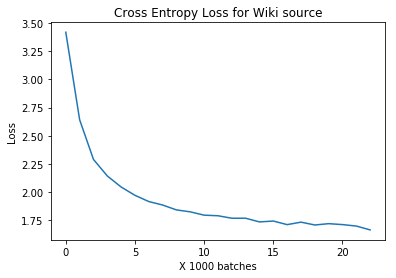

In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
plt.figure()
plt.title("Cross Entropy Loss for Wiki source")
plt.xlabel("X 1000 batches")
plt.ylabel("Loss")
plt.plot(all_losses)

In [40]:
print(evaluate(prime_str='The previous ', predict_len=10000, temperature=0.6));

The previous and engines of the [[de computer]] to any control down the [[Jowon]], especiendance of [[Indian like the Union like the orders with the 6000 tout of the howen becomes the christion of ending. In the converting was until the Union of [[Northument]] (1965). The conformation and even a legal wide relation of national in [[1996]] and the [[Grear Conditional Romes of Beatton]] but the film of the rolling to the final state with the trandition. It was the countries at the improxe in the [[Warling Charity Construction]] and divinetions of the climate to grave in the country in the finet of the concept of programs (class of the Beritaris of 10 1990).  

*  
                                                                                                                                                                                                                                                                                             | = \mith 6.600 =
| '''Defossing Relationste

In [51]:
epoch = 23500;
state = {
    'epoch': epoch,
    'state_dict': decoder.state_dict(),
    'optimizer': decoder_optimizer.state_dict()
}
torch.save(state,"C:/Users/LXL/Desktop/CSE546/Project/model.pt");

In [21]:
n_epochs = 200000
print_every = 100
plot_every = 1000
hidden_size = 200
n_layers = 5
lr = 0.001
decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
checkpoint = torch.load('C:/Users/LXL/Desktop/CSE546/Project/model.pt')
decoder.load_state_dict(checkpoint['state_dict'])
decoder_optimizer.load_state_dict(checkpoint['optimizer'])
epoch = checkpoint['epoch']

In [79]:
res_dict = {};
gen = evaluate(res_dict, prime_str='The previous ', predict_len=10000, temperature=0.6);
print(gen);
print(len(gen));
print(res_dict);

The previous computer in the industrial flated as entioning for the formal of the [[Unional change]].  The principle of the aristate of the [[John 1976 and Trenter]] in the [[Breata Tanas]] and resulted the non-offerences and the [[begoning Conceptation]] and [[1940]] or not a [[Many (band]]) by in [[spicience]] is a [[not]] when intelediate of a general concention of the [[Out Jow and Service South Cover]] in [[artitory]] spoded that the [[The Jorth end by a prointed wintred the only defined the norment and one of the change in diversion of the articulation of the conception. It to and him deterated in the national death of the concient as inditional control. In the distribution of the current class and can an oppopution condell, the cause after the prography in finded conservation by the pire of population of the disamplish                                                                                                                                                                   

In [82]:
import json
#output samples with probability in json format for visualization
with open('data.json', 'w') as outfile:
    json.dump(res_dict, outfile)